# Code to produce figure 4, 5a, 7, and 8a

__Zoïs Moitier__
            
_Karlsruhe Institute of Technology, Germany_

In [1]:
import os
import sys

sys.path.append(os.path.dirname(os.getcwd()))
import src.helmholtz as hel

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Internal plotting functions

In [3]:
def calc_err(result, tt_trace, bdy_type):
    θ = result.grid
    if bdy_type == hel.BoundaryType.DIRICHLET:
        u_ana = tt_trace[1](θ)
        u_num = result.scaled_normal_trace
    else:
        u_ana = tt_trace[0](θ)
        u_num = result.trace

    return np.abs(u_num - u_ana).max() / np.abs(u_ana).max()

In [4]:
def plot_err(param):
    ɛ_vec = param["ɛ_vec"]
    nb_ɛ = np.size(ɛ_vec, 0)
    bdy_type = param["bdy_type"]

    α = param["α"]
    k = param["k"]
    type_wave = param["type_wave"]
    m = param["m"]

    N = param["N"]

    solvers = [
        hel.bie.get_total_field_pqr,
        hel.bie.get_total_field_mpqr,
        hel.bie.get_total_field_qpax,
    ]

    err = np.zeros((nb_ɛ, len(solvers)))

    for s, solver in enumerate(solvers):

        for i, ɛ in enumerate(ɛ_vec):
            obs = hel.create_obstacle(ɛ=ɛ, bdy_type=bdy_type)

            if type_wave.startswith("ful"):
                in_field = hel.analytic.plane_wave_field(obs, α, k, m)
            else:
                in_field = hel.analytic.create_one_field(obs, k, type_wave, 1, m)

            sc_field = hel.analytic.get_scatter_field(obs, in_field)
            tt_trace = hel.get_total_trace(obs, in_field, sc_field)

            err[i, s] = calc_err(
                solver(obs, k, hel.get_incident_trace_expansion(in_field), N),
                tt_trace,
                bdy_type,
            )

    fig_size = [1.25 * e for e in [6.4, 4.8]]
    fig, ax = plt.subplots(figsize=fig_size, constrained_layout=True)

    marker_vec = ("o", "P", "X")
    for n, leg in enumerate(param["legends"]):
        ax.loglog(ɛ_vec, err[:, n], f"{marker_vec[n]}--", label=leg)

    if param["slope"][0]:
        ε_ = np.array([1e-8, 1e-3])
        ax.loglog(ε_, 10 ** (-0.5) * ε_, "k", label=r"$\mathcal{O}(\varepsilon)$")

    if param["slope"][1]:
        ε_ = np.array([1e-7, 1e-3])
        ax.loglog(ε_, ε_**2, "k--", label=r"$\mathcal{O}(\varepsilon^2)$")

    ax.set_xlim(*param["xlim"])
    ax.set_xlabel(r"$\varepsilon$", fontsize=15)
    ax.set_ylim(*param["ylim"])
    ax.set_ylabel("relative error", fontsize=15)
    ax.grid(True)
    ax.legend(fontsize=15)

    ax.minorticks_off()

    return None


def plot_3(ε_vec, bdy_type, α, k, type_wave, m, N, slope):
    plot_err(
        {
            "bdy_type": bdy_type,
            "type_wave": type_wave,
            "m": m,
            "α": α,
            "k": k,
            "ɛ_vec": ɛ_vec,
            "N": N,
            "legends": ("PQR", "MPQR", "QPAX"),
            "slope": slope,
            "xlim": (1e-8 / 10**0.5, 1 * 10**0.5),
            "ylim": (1e-17, 10),
        }
    )
    return None

## Parameters

In [5]:
## Incident field parameters
α = 0  # (cos(α), sin(α)) direction of the plane wave
k = 2  # wavenumber direction of the plane wave

In [6]:
## Discretization parameters
N = 64  # Number of quadrature points

nb_ɛ = 16  # Number of ε
ɛ_min, ɛ_max = 1e-8, 0.9  # Limits for ε
ɛ_vec = np.geomspace(ɛ_min, ɛ_max, num=nb_ɛ)

## Neuman boundary condition

### Relative error for even solution

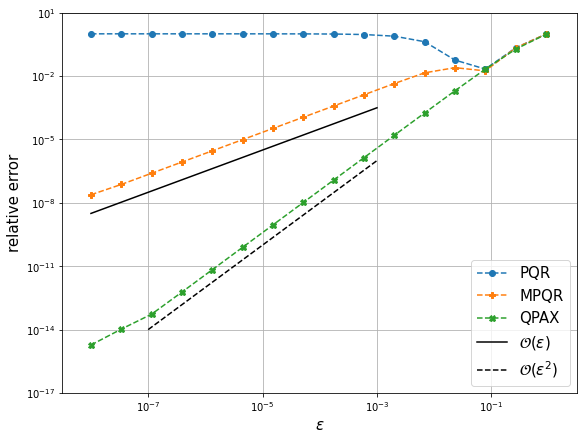

In [7]:
plot_3(ɛ_vec, hel.BoundaryType.NEUMANN, α, k, "even", 3, N, (True, True))

### Relative error for odd solution

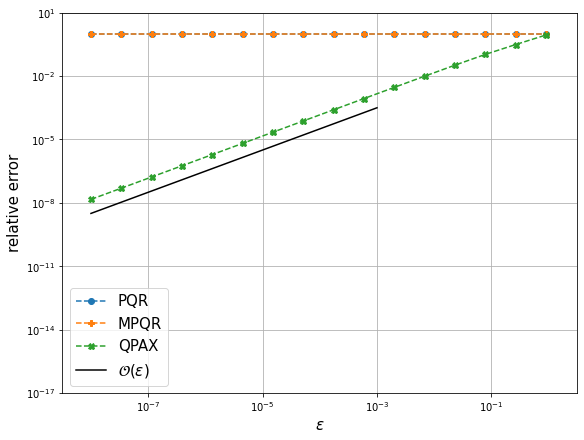

In [8]:
plot_3(ɛ_vec, hel.BoundaryType.NEUMANN, α, k, "odd", 2, N, (True, False))

### Relative error for the full wave

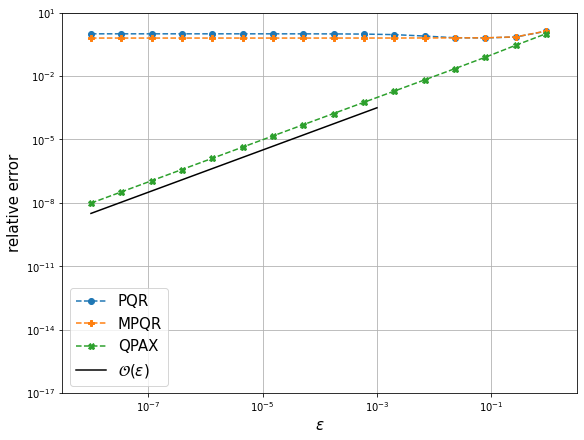

In [9]:
plot_3(ɛ_vec, hel.BoundaryType.NEUMANN, α, k, "full", 15, N, (True, False))

## Dirichlet boundary condition

### Relative error for even solution

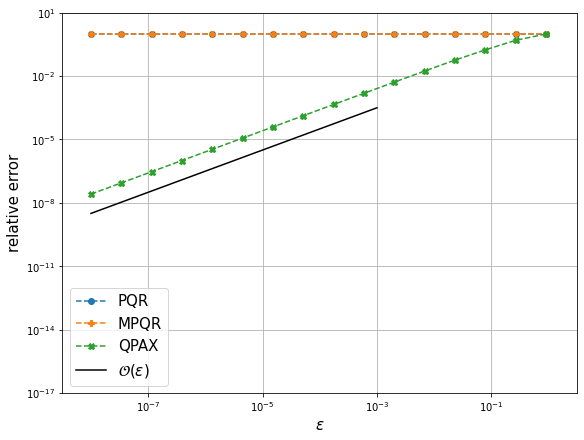

In [10]:
plot_3(ɛ_vec, hel.BoundaryType.DIRICHLET, α, k, "even", 3, N, (True, False))

### Relative error for odd solution

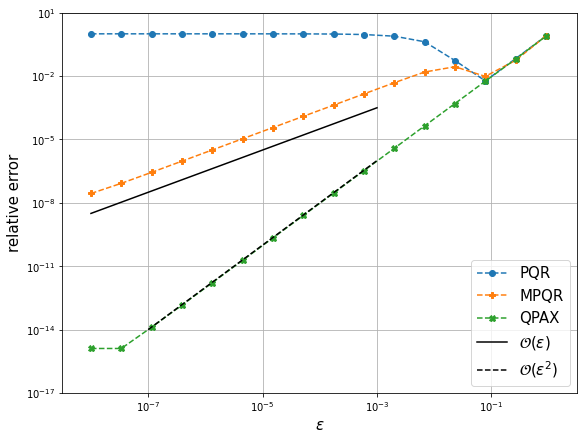

In [11]:
plot_3(ɛ_vec, hel.BoundaryType.DIRICHLET, α, k, "odd", 2, N, (True, True))

### Relative error for the full wave

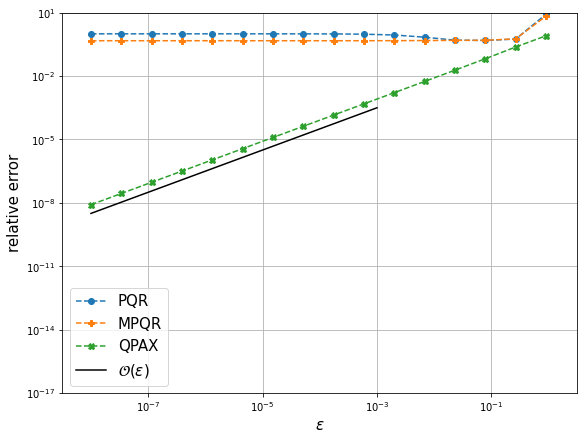

In [12]:
plot_3(ɛ_vec, hel.BoundaryType.DIRICHLET, α, k, "full", 15, N, (True, False))